## 1º Entregable_Data_Engineer

### - El objetivo de este dataset es: Predecir el precio del vehículo, (ojo que si bien el objetivo es predecir el precio no será necesario hacer la predicción).

### Importamos librerias y leemos el fichero

In [7]:
%pip install pandas numpy matplotlib seaborn scikit-learn missingno 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# IMPORTAMOS LIBRERÍAS:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
import missingno as msno

In [9]:
# Leo el fichero
bmw = pd.read_csv(r"C:\Users\Jfeij\OneDrive\Documentos\DATA ANALYST\DATA SCIENCE\TFM\1° Entregable_Data_Engineer\bmw_pricing_v3.csv", sep=",")
bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [10]:
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [11]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [12]:
# Saco el porcentaje de valores nulos que tengo en mi DataFrame
((bmw.isna().sum()/len(bmw)) * 100).round()

marca                          20.0
modelo                          0.0
km                              0.0
potencia                        0.0
fecha_registro                 50.0
tipo_gasolina                   0.0
color                           9.0
tipo_coche                     30.0
volante_regulable               0.0
aire_acondicionado             10.0
camara_trasera                  0.0
asientos_traseros_plegables    70.0
elevalunas_electrico            0.0
bluetooth                      15.0
gps                             0.0
alerta_lim_velocidad           15.0
precio                          0.0
fecha_venta                     0.0
dtype: float64

### Variables Null, Limpieza y prepocesamiento de datos

##### Transformacion de (fecha_registro, fecha_venta) a formato pd.datetime 

In [13]:
#Primero:
# Transformacion de (fecha_registro, fecha_venta) a formato pd.datetime 

for i in ["fecha_registro", "fecha_venta"]:
    bmw[i] = pd.to_datetime(bmw[i])

In [14]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

##### Fecha_Registro

<Axes: >

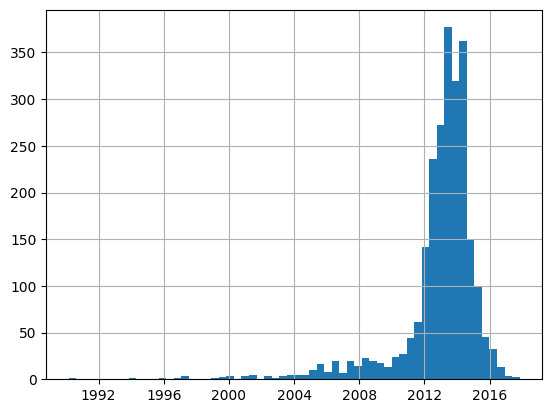

In [15]:
# Realizo un histograma para ver como se distribuyen los valores de "fecha_registro"

bmw["fecha_registro"].hist(bins=60)

In [16]:
# Saco la mediana para la variable "fecha_registo", y le aplicamos la mediana a los null. 

bmw["fecha_registro"].dt.year.median()

np.float64(2013.0)

Aqui se puede observar que el año de mediana es 2013, por ende procedo a aplicar la mediana a los valores nulos.


In [17]:
bmw["fecha_registro"].describe()

count                             2420
mean     2012-12-06 07:35:12.396694016
min                1990-03-01 00:00:00
25%                2012-07-01 00:00:00
50%                2013-07-01 00:00:00
75%                2014-04-01 00:00:00
max                2017-11-01 00:00:00
Name: fecha_registro, dtype: object

In [18]:
# Utilizo la mediana para reemplazar el 50 % de valores nulos que tenemos en la variable.

mediana_fecha_registro = bmw["fecha_registro"].median()
bmw["fecha_registro"].fillna(mediana_fecha_registro, inplace= True)

Aunque la columna fecha_registro tiene un 50% de valores nulos, se decidió mantenerla porque es una variable potencialmente importante para predecir el precio del vehículo. La fecha de registro permite calcular la antigüedad del coche, una característica clave en la determinación del precio. Además, los valores nulos se imputaron utilizando la mediana, ya que la distribución está concentrada en años recientes (2012-2017) y la mediana refleja este patrón.

In [19]:
# Muestro el porcentaje de nulos, vemos que "fecha_registro", ya no tiene valores nulos

((bmw.isna().sum()/len(bmw)) * 100).round(5)

marca                          20.02891
modelo                          0.06195
km                              0.04130
potencia                        0.02065
fecha_registro                  0.00000
tipo_gasolina                   0.10324
color                           9.18852
tipo_coche                     30.14660
volante_regulable               0.08259
aire_acondicionado             10.03510
camara_trasera                  0.04130
asientos_traseros_plegables    70.01858
elevalunas_electrico            0.04130
bluetooth                      15.03200
gps                             0.00000
alerta_lim_velocidad           15.03200
precio                          0.12389
fecha_venta                     0.02065
dtype: float64

Lo que si podemos apreciar que hay "outliers", de coches que son antes del 2000, por ende creo una variable llamada outliers con filtro de los registros que estan antes del año '2000'

count                             4843
mean     2013-03-19 17:19:47.115424512
min                1990-03-01 00:00:00
25%                2013-07-01 00:00:00
50%                2013-07-01 00:00:00
75%                2013-07-01 00:00:00
max                2017-11-01 00:00:00
Name: fecha_registro, dtype: object

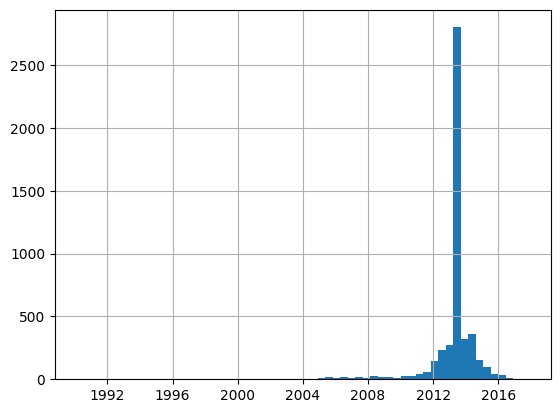

In [20]:
bmw["fecha_registro"].hist(bins=60)
bmw["fecha_registro"].describe()

In [21]:
# Creo la variable para los outliers, pero decidimos dejar esos registros, para tratarlos luego con la antiguedad.
outliers_fecha_registro = bmw[bmw['fecha_registro'] <= '2000-01-01']
outliers_fecha_registro

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,BMW,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01
2591,BMW,316,178231.0,77.0,1999-11-01,petrol,green,sedan,False,False,False,NaN,False,True,True,False,700.0,2018-02-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2771,BMW,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,NaN,False,False,False,False,1300.0,2018-04-01
3062,BMW,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,False,True,True,400.0,2018-04-01
3380,BMW,525,245302.0,105.0,1997-01-01,diesel,green,NaN,False,True,False,NaN,False,False,True,True,900.0,2018-06-01
3387,BMW,525,266641.0,85.0,1999-03-01,diesel,black,sedan,True,False,False,False,False,False,True,False,800.0,2018-06-01
3449,BMW,316,184233.0,77.0,1999-06-01,petrol,NaN,sedan,False,False,False,False,False,False,True,False,400.0,2018-07-01


In [22]:
# Se puede observar que de 4843 registros solo el 0,20% son menores al año 2000, por lo que no afecta a la variable demasiado por ahora
print(len(outliers_fecha_registro), len(bmw), len(outliers_fecha_registro)/len(bmw) * 100)

10 4843 0.20648358455502788


##### Asientos_traseros_plegables (Eliminada)

In [23]:
# Seguimos mostrando el % de nulos para tratar las demas variables

(bmw.isna().sum()/len(bmw)*100).round()

marca                          20.0
modelo                          0.0
km                              0.0
potencia                        0.0
fecha_registro                  0.0
tipo_gasolina                   0.0
color                           9.0
tipo_coche                     30.0
volante_regulable               0.0
aire_acondicionado             10.0
camara_trasera                  0.0
asientos_traseros_plegables    70.0
elevalunas_electrico            0.0
bluetooth                      15.0
gps                             0.0
alerta_lim_velocidad           15.0
precio                          0.0
fecha_venta                     0.0
dtype: float64

In [24]:
# Vemos que la variable "asientos_traseros_plegables", tiene demasiado nulos un 70% de sus registros son nulos.

bmw["asientos_traseros_plegables"].isna().sum()

np.int64(3391)

In [25]:
bmw["asientos_traseros_plegables"].shape

(4843,)

Demasiados valores nulos:

-Tiene 3388 nulos de un total de 4833 registros, lo que representa aproximadamente el 70% de los datos, tomo la decision de eliminarla, ya que no creo que sea una variable que nos pueda aportar demasiado al modelo.

In [26]:
bmw.drop(columns=['asientos_traseros_plegables'], inplace=True)
bmw

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2013-07-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2013-07-01,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2013-07-01,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,2013-07-01,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


In [27]:
(bmw.isna().sum()/len(bmw)*100).round(5)

marca                   20.02891
modelo                   0.06195
km                       0.04130
potencia                 0.02065
fecha_registro           0.00000
tipo_gasolina            0.10324
color                    9.18852
tipo_coche              30.14660
volante_regulable        0.08259
aire_acondicionado      10.03510
camara_trasera           0.04130
elevalunas_electrico     0.04130
bluetooth               15.03200
gps                      0.00000
alerta_lim_velocidad    15.03200
precio                   0.12389
fecha_venta              0.02065
dtype: float64

##### Marca (Eliminada)

In [28]:
bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [29]:
bmw.drop(columns= ["marca"], inplace=True)

In [30]:
bmw.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,2013-07-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2013-07-01,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,2013-07-01,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01


La columna marca fue eliminada porque solo contiene un valor (BMW) en todos los registros, lo que no aporta información útil ni variabilidad para el análisis o el modelo.

##### *Guardamos el doc, en un pickle

In [31]:
bmw2 = bmw.copy()

In [32]:
bmw2.to_pickle('bmw_procesado.pkl')

In [33]:
bmw2 = pd.read_pickle('bmw_procesado.pkl')

##### Tipo_Coche

In [34]:
bmw2["tipo_coche"].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

Mi idea para tratar los nulos en la variable tipo_coche era reemplazarlo por la moda pero antes de hacerlo, decidi relacionarla con el target
a ver si varia demasiado.

In [35]:
# Mediante la funcion groupby, agrupo tipo_coche y precio, mostrando la media

bmw2.groupby('tipo_coche')['precio'].mean().round(2)

tipo_coche
convertible    16796.67
coupe          22518.67
estate         13051.81
hatchback      13275.82
sedan          16086.85
subcompact      9732.47
suv            21744.77
van            14813.79
Name: precio, dtype: float64

<Axes: xlabel='tipo_coche', ylabel='precio'>

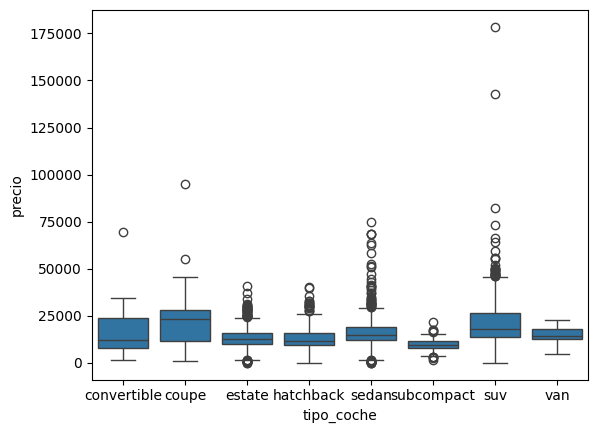

In [36]:
# Con un Boxplot, podremos ver como se distribuyen mejor los valores.
sns.boxplot(x='tipo_coche', y='precio', data=bmw2)

Podríamos justificar que variables como tipo_coche están relacionadas con el precio, lo que las convierte en buenas candidatas para incluir en un modelo.

Implementar la moda en esta variable seria una opcion?,
Que pasa si imputo con la moda (estate)?:

Imputar todo con la moda distorsionaría las frecuencias de las categorías, haciendo que los estate sean artificialmente más comunes.

In [37]:
# Divido los precios en rangos de precio
bmw2.groupby(pd.cut(bmw2['precio'], bins=[0, 15000, 20000, 50000]))['tipo_coche'].value_counts(normalize=True)

C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\354518396.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmw2.groupby(pd.cut(bmw2['precio'], bins=[0, 15000, 20000, 50000]))['tipo_coche'].value_counts(normalize=True)


precio          tipo_coche 
(0, 15000]      estate         0.408185
                sedan          0.224554
                hatchback      0.173662
                suv            0.129591
                subcompact     0.035677
                coupe          0.011542
                convertible    0.008395
                van            0.008395
(15000, 20000]  sedan          0.303571
                estate         0.286990
                suv            0.253827
                hatchback      0.114796
                coupe          0.012755
                van            0.012755
                subcompact     0.010204
                convertible    0.005102
(20000, 50000]  suv            0.447289
                sedan          0.218373
                estate         0.152108
                hatchback      0.100904
                coupe          0.061747
                convertible    0.013554
                van            0.004518
                subcompact     0.001506
Name: propor

Los nulos fueron rellenados de manera lógica según los patrones observados entre tipo_coche y precio.

In [38]:
# Estrategia de imputación condicional:

# Mayor probabilidad: estate (40.8%), luego sedan (22.4%).

bmw2.loc[(bmw2['tipo_coche'].isna()) & (bmw2['precio'] <= 15000), 'tipo_coche'] = 'estate'

In [39]:
# Rango medio (15,000 - 20,000):

# Mayor probabilidad: sedan (30.3%), estate (28.6%), o SUV (25.3%).

bmw2.loc[(bmw2['tipo_coche'].isna()) & (bmw2['precio'] <= 20000), 'tipo_coche'] = 'sedan'

In [40]:
# Rango alto (20,000 - 50,000):

# Mayor probabilidad: SUV (44.7%), seguido de sedan (21.8%).

bmw2.loc[(bmw2['tipo_coche'].isna()) & (bmw2['precio'] > 20000), 'tipo_coche'] = 'SUV'

In [41]:
# Corroboro si quedaron valores nulos en "tipo_coche"
bmw2["tipo_coche"].isna().sum()

np.int64(2)

In [42]:
# aqui tengo que hacer un drop.na
bmw2 = bmw2.dropna(subset=['tipo_coche'])

In [43]:
bmw2['tipo_coche'].isna().sum()

np.int64(0)

In [44]:
bmw2["tipo_coche"].value_counts()

tipo_coche
estate         1934
sedan          1160
suv             755
hatchback       488
SUV             292
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

- Se demostro la importancia de tipo_coche para confirmar su relación con el target (precio).
- Uso rangos de precio para identificar patrones de distribución en tipo_coche.
- Se Imputan los valores nulos de manera condicional, asignando categorías basadas en el precio.

Que se busca con esta idea?:

- Preserva la relación con el target (precio).
- Evita eliminar datos innecesariamente.
- Minimiza el sesgo introducido.

In [45]:
bmw2.isnull().sum()/len(bmw2)*100

modelo                   0.061971
km                       0.041314
potencia                 0.020657
fecha_registro           0.000000
tipo_gasolina            0.103284
color                    9.192316
tipo_coche               0.000000
volante_regulable        0.082628
aire_acondicionado      10.039248
camara_trasera           0.041314
elevalunas_electrico     0.041314
bluetooth               15.038215
gps                      0.000000
alerta_lim_velocidad    15.038215
precio                   0.082628
fecha_venta              0.020657
dtype: float64

##### Bluetooht

In [46]:
bmw2['bluetooth'].isna().sum()/len(bmw2)*100

np.float64(15.038215244784137)

In [47]:
bmw2['bluetooth'].value_counts()

bluetooth
False    3118
True      995
Name: count, dtype: int64

In [48]:
#Verifico la relacion con el target(precio)
bmw2.groupby(bmw2['bluetooth'].isna())['precio'].mean()

bluetooth
False    15739.522998
True     16353.434066
Name: precio, dtype: float64

In [49]:
bmw2['bluetooth'].mode()

0    False
Name: bluetooth, dtype: object

In [50]:
#Relleno valores con la moda (False), ya que son pocos valores (15%) y no afectan significativamente al data frame
bmw2['bluetooth'].fillna(False, inplace=True)

C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\15205084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw2['bluetooth'].fillna(False, inplace=True)
C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\15205084.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw2['bluetooth'].fillna(False, inplace=True

In [51]:
bmw2['bluetooth'].isna().sum()

np.int64(0)

In [52]:
bmw2.isnull().sum()/len(bmw2)*100

modelo                   0.061971
km                       0.041314
potencia                 0.020657
fecha_registro           0.000000
tipo_gasolina            0.103284
color                    9.192316
tipo_coche               0.000000
volante_regulable        0.082628
aire_acondicionado      10.039248
camara_trasera           0.041314
elevalunas_electrico     0.041314
bluetooth                0.000000
gps                      0.000000
alerta_lim_velocidad    15.038215
precio                   0.082628
fecha_venta              0.020657
dtype: float64

##### Alerta_lim_velocidad

In [53]:
bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2239
False    1874
Name: count, dtype: int64

In [54]:
bmw["alerta_lim_velocidad"].isna().sum()

np.int64(728)

In [55]:
# Lo mismo que ocurrio con la variable "bluetooth", relleno valores con la moda (True), ya que son pocos valores (15%) y no afectan significativamente al data frame

bmw2["alerta_lim_velocidad"].fillna(True, inplace = True)

C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\1114208991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw2["alerta_lim_velocidad"].fillna(True, inplace = True)
C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\1114208991.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw2["alerta_lim_velocidad"]

In [56]:
bmw2["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2967
False    1874
Name: count, dtype: int64

In [57]:
bmw2["alerta_lim_velocidad"].isna().sum()

np.int64(0)

##### Color (Agrupamos solo en 3 categorias, con categoria "Otros")

In [58]:
(bmw2["color"].isna().sum()/len(bmw2)*100).round()

np.float64(9.0)

In [59]:
# Aqui en esta variable al solo tener un 9% de valores nulos, se me ocurre quedarme con los dos primeros valores ya que son los mas .

bmw2["color"].value_counts()

color
black     1499
grey      1070
blue       645
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [60]:
# Primero selecciono el top 2 de colores, y luego los demas los coloco en otra categoria como "Otros":

Top_color = bmw2["color"].value_counts().head(2).index

bmw2["Color_simplificado"] = bmw2["color"].apply(
    lambda x:
    x if x in Top_color 
    else "Otros")

In [61]:
bmw2["Color_simplificado"].value_counts()

Color_simplificado
Otros    2272
black    1499
grey     1070
Name: count, dtype: int64

In [62]:
# Asigno los valores nulos de la variable "color" (9%), al ser pocos a la moda.

bmw2["color"] = bmw2["color"].fillna("black")


In [63]:
bmw2["Color_simplificado"] = bmw2["color"].apply(
    lambda x:
    x if x in Top_color 
    else "Otros")

In [64]:
bmw2["Color_simplificado"].value_counts()

Color_simplificado
black    1944
Otros    1827
grey     1070
Name: count, dtype: int64

In [65]:
bmw2.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado
0,118,140411.0,100.0,2012-02-01,diesel,black,estate,True,True,False,True,False,True,True,11300.0,2018-01-01,black
1,M4,13929.0,317.0,2013-07-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,grey
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,Otros
3,420,128035.0,135.0,2013-07-01,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,Otros
4,425,97097.0,160.0,2013-07-01,diesel,silver,SUV,True,True,False,False,True,True,True,33400.0,2018-04-01,Otros
5,335,152352.0,225.0,2011-05-01,petrol,black,sedan,True,True,False,True,True,True,True,17100.0,2018-02-01,black
6,325,205219.0,145.0,2013-07-01,diesel,grey,convertible,True,True,False,True,True,True,True,12400.0,2018-02-01,grey
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,Otros
8,Z4,123886.0,125.0,2013-07-01,petrol,black,convertible,True,False,False,False,False,True,False,6200.0,2018-03-01,black
9,320,139541.0,135.0,2013-07-01,diesel,white,convertible,False,False,False,True,False,True,False,17300.0,2018-03-01,Otros


In [66]:
# Guardamos copia

bmw2_original = bmw2.copy() 

In [67]:
# Borramos la columna "Color", ya que creamos color_simplificado:

bmw2.drop(columns=["color"], inplace = True)

In [68]:
bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado
0,118,140411.0,100.0,2012-02-01,diesel,estate,True,True,False,True,False,True,True,11300.0,2018-01-01,black
1,M4,13929.0,317.0,2013-07-01,petrol,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,grey
2,320,183297.0,120.0,2012-04-01,diesel,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,Otros
3,420,128035.0,135.0,2013-07-01,diesel,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,Otros
4,425,97097.0,160.0,2013-07-01,diesel,SUV,True,True,False,False,True,True,True,33400.0,2018-04-01,Otros


##### Aire_acondicionado

In [69]:
bmw2["aire_acondicionado"].isna().sum()

np.int64(486)

In [70]:
bmw2["aire_acondicionado"].value_counts()

aire_acondicionado
True     3463
False     892
Name: count, dtype: int64

In [71]:
# Asignamos la moda (True), ya que son muy pocos nulos, y hay una gran cantidad de valores True:

bmw2["aire_acondicionado"].fillna(True, inplace=True)

C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\2000338665.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bmw2["aire_acondicionado"].fillna(True, inplace=True)
C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\2000338665.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw2["aire_acondicionado"].filln

In [72]:
bmw2["aire_acondicionado"].isna().sum()

np.int64(0)

In [73]:
bmw2["aire_acondicionado"].value_counts()

aire_acondicionado
True     3949
False     892
Name: count, dtype: int64

#### Repaso de variables, y chequeo de tipos de datos

In [74]:
bmw2.isna().sum()

modelo                  3
km                      2
potencia                1
fecha_registro          0
tipo_gasolina           5
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  4
fecha_venta             1
Color_simplificado      0
dtype: int64

In [75]:
# Podemos observar que quedan casi nada de nulos, en algunas variables

bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4841 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4838 non-null   object        
 1   km                    4839 non-null   float64       
 2   potencia              4840 non-null   float64       
 3   fecha_registro        4841 non-null   datetime64[ns]
 4   tipo_gasolina         4836 non-null   object        
 5   tipo_coche            4841 non-null   object        
 6   volante_regulable     4837 non-null   object        
 7   aire_acondicionado    4841 non-null   bool          
 8   camara_trasera        4839 non-null   object        
 9   elevalunas_electrico  4839 non-null   object        
 10  bluetooth             4841 non-null   bool          
 11  gps                   4841 non-null   bool          
 12  alerta_lim_velocidad  4841 non-null   bool          
 13  precio                4

In [76]:
for i in bmw2:
  if bmw2[i].dtype.kind == "O":
    print(bmw2[i].value_counts(), '\n')
  elif (bmw2[i].dtype.kind=="f") or (bmw2[i].dtype.kind=="i"):
    print(bmw2[i].value_counts(), '\n')
  elif (bmw2[i].dtype.kind=="b"):
    print(bmw2[i].value_counts(),'\n')

modelo
320                  750
520                  633
318                  568
X3                   438
116                  358
                    ... 
216                    1
220 Active Tourer      1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 76, dtype: int64 

km
94829.0     2
177379.0    2
129317.0    2
178558.0    2
129214.0    2
           ..
39743.0     1
49832.0     1
19633.0     1
27920.0     1
181252.0    1
Name: count, Length: 4782, dtype: int64 

potencia
135.0    881
120.0    784
85.0     631
100.0    570
105.0    451
        ... 
412.0      1
0.0        1
423.0      1
300.0      1
261.0      1
Name: count, Length: 61, dtype: int64 

tipo_gasolina
diesel           4629
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

tipo_coche
estate         1934
sedan          1160
suv             755
hatchback       488
SUV             292
subcompact       77
coup

In [77]:
bmw2.isna().sum()

modelo                  3
km                      2
potencia                1
fecha_registro          0
tipo_gasolina           5
tipo_coche              0
volante_regulable       4
aire_acondicionado      0
camara_trasera          2
elevalunas_electrico    2
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  4
fecha_venta             1
Color_simplificado      0
dtype: int64

In [78]:
bmw2 = bmw2.dropna(subset=["modelo","km","potencia","tipo_gasolina","tipo_coche","volante_regulable","camara_trasera","elevalunas_electrico","precio","fecha_venta"])

In [79]:
bmw2.isna().sum()

modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
Color_simplificado      0
dtype: int64

In [80]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   fecha_registro        4817 non-null   datetime64[ns]
 4   tipo_gasolina         4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   object        
 7   aire_acondicionado    4817 non-null   bool          
 8   camara_trasera        4817 non-null   object        
 9   elevalunas_electrico  4817 non-null   object        
 10  bluetooth             4817 non-null   bool          
 11  gps                   4817 non-null   bool          
 12  alerta_lim_velocidad  4817 non-null   bool          
 13  precio                4

Podemos Observar que las variables "volante_regulable", "camara_trasera", "elevalunas_electrico", por mas de no tener nulos, el DataFrame, los sigue considerando como valores categoricos, procedemos a pasarlos a booleanos

In [81]:
# Utilizo el replace, y el astype para transformar las variables a tipo bool

bmw2["volante_regulable"] = bmw2["volante_regulable"].replace({"True": True, "False": False}).astype(bool)
bmw2["camara_trasera"] = bmw2["camara_trasera"].replace({"True": True, "False": False}).astype(bool)
bmw2["elevalunas_electrico"] = bmw2["elevalunas_electrico"].replace({"True": True, "False": False}).astype(bool)

C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\2200800536.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw2["volante_regulable"] = bmw2["volante_regulable"].replace({"True": True, "False": False}).astype(bool)
C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\2200800536.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bmw2["camara_trasera"] = bmw2["camara_trasera"].replace({"True": True, "False": False}).astype(bool)
C:\Users\Jfeij\AppData\Local\Temp\ipykernel_11652\2200800536.py:5: FutureWarning: Downcasting behavior

In [82]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   fecha_registro        4817 non-null   datetime64[ns]
 4   tipo_gasolina         4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   bool          
 7   aire_acondicionado    4817 non-null   bool          
 8   camara_trasera        4817 non-null   bool          
 9   elevalunas_electrico  4817 non-null   bool          
 10  bluetooth             4817 non-null   bool          
 11  gps                   4817 non-null   bool          
 12  alerta_lim_velocidad  4817 non-null   bool          
 13  precio                4

In [83]:
# Guardo en pickle
bmw2.to_pickle('bmw_procesado.pkl')

#### Creamos una nueva variable para calcular la Antiguedad del coche en años

In [84]:
bmw2["Antiguedad"] = (bmw2["fecha_venta"] - bmw2["fecha_registro"]).dt.days//365

In [85]:
bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado,Antiguedad
0,118,140411.0,100.0,2012-02-01,diesel,estate,True,True,False,True,False,True,True,11300.0,2018-01-01,black,5
1,M4,13929.0,317.0,2013-07-01,petrol,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,grey,4
2,320,183297.0,120.0,2012-04-01,diesel,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,Otros,5
3,420,128035.0,135.0,2013-07-01,diesel,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,Otros,4
4,425,97097.0,160.0,2013-07-01,diesel,SUV,True,True,False,False,True,True,True,33400.0,2018-04-01,Otros,4


#### Chequeo Duplicados y Reset Index

In [86]:
# Chequeo de duplicados

duplicados = bmw2[bmw2.duplicated()]
print(f"Duplicados encontrados: {len(duplicados)}")

Duplicados encontrados: 0


Observando que no hay duplicados, procedo creando una variable para sacar los meses en los que mas se vendieron coches para poder ver su evolucion:

In [87]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4817 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   fecha_registro        4817 non-null   datetime64[ns]
 4   tipo_gasolina         4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   bool          
 7   aire_acondicionado    4817 non-null   bool          
 8   camara_trasera        4817 non-null   bool          
 9   elevalunas_electrico  4817 non-null   bool          
 10  bluetooth             4817 non-null   bool          
 11  gps                   4817 non-null   bool          
 12  alerta_lim_velocidad  4817 non-null   bool          
 13  precio                4

In [88]:
# Podemos obeservar que los indices no estan ajustados
bmw2.tail()

,modelo,km,potencia,fecha_registro,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado,Antiguedad
4838,218 Gran Tourer,39743.0,110.0,2013-07-01,diesel,estate,False,True,False,False,False,True,False,14600.0,2018-08-01,black,5
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,sedan,False,True,False,False,False,True,True,17500.0,2018-08-01,grey,3
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,van,False,True,False,False,False,True,True,17000.0,2018-09-01,grey,2
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,van,True,True,False,False,False,True,True,22700.0,2018-09-01,Otros,2
4842,525,195840.0,160.0,2013-07-01,diesel,sedan,True,True,False,True,False,True,True,15500.0,2018-09-01,grey,5


In [89]:
# Guardamos en pickle

bmw2.to_pickle('bmw_procesado.pkl')

In [90]:
# Leemos el pickle

bmw2 = pd.read_pickle('bmw_procesado.pkl')

In [91]:
# Reajustamos el orden de los indices del Data Frame

bmw2 = bmw2.reset_index(drop=True)

In [92]:
bmw2.tail()

,modelo,km,potencia,fecha_registro,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado,Antiguedad
4812,218 Gran Tourer,39743.0,110.0,2013-07-01,diesel,estate,False,True,False,False,False,True,False,14600.0,2018-08-01,black,5
4813,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,sedan,False,True,False,False,False,True,True,17500.0,2018-08-01,grey,3
4814,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,van,False,True,False,False,False,True,True,17000.0,2018-09-01,grey,2
4815,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,van,True,True,False,False,False,True,True,22700.0,2018-09-01,Otros,2
4816,525,195840.0,160.0,2013-07-01,diesel,sedan,True,True,False,True,False,True,True,15500.0,2018-09-01,grey,5


### Analisis de Meses con variable fecha_Venta

In [93]:
bmw2.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Color_simplificado,Antiguedad
0,118,140411.0,100.0,2012-02-01,diesel,estate,True,True,False,True,False,True,True,11300.0,2018-01-01,black,5
1,M4,13929.0,317.0,2013-07-01,petrol,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,grey,4
2,320,183297.0,120.0,2012-04-01,diesel,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,Otros,5
3,420,128035.0,135.0,2013-07-01,diesel,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,Otros,4
4,425,97097.0,160.0,2013-07-01,diesel,SUV,True,True,False,False,True,True,True,33400.0,2018-04-01,Otros,4
5,335,152352.0,225.0,2011-05-01,petrol,sedan,True,True,False,True,True,True,True,17100.0,2018-02-01,black,6
6,325,205219.0,145.0,2013-07-01,diesel,convertible,True,True,False,True,True,True,True,12400.0,2018-02-01,grey,4
7,118,115560.0,105.0,2009-08-01,petrol,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,Otros,8
8,Z4,123886.0,125.0,2013-07-01,petrol,convertible,True,False,False,False,False,True,False,6200.0,2018-03-01,black,4
9,320,139541.0,135.0,2013-07-01,diesel,convertible,False,False,False,True,False,True,False,17300.0,2018-03-01,Otros,4


In [94]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4817 non-null   object        
 1   km                    4817 non-null   float64       
 2   potencia              4817 non-null   float64       
 3   fecha_registro        4817 non-null   datetime64[ns]
 4   tipo_gasolina         4817 non-null   object        
 5   tipo_coche            4817 non-null   object        
 6   volante_regulable     4817 non-null   bool          
 7   aire_acondicionado    4817 non-null   bool          
 8   camara_trasera        4817 non-null   bool          
 9   elevalunas_electrico  4817 non-null   bool          
 10  bluetooth             4817 non-null   bool          
 11  gps                   4817 non-null   bool          
 12  alerta_lim_velocidad  4817 non-null   bool          
 13  precio            

In [95]:
# Extraemos el mes de la clumna "fecha_Venta"

bmw2["mes_venta"]=bmw2["fecha_venta"].dt.month

In [96]:
# Creo una variable de ventas por mes en orden con la cantidad de ventas para luego pasarla al grafico de barras

ventas_por_mes = bmw2["mes_venta"].value_counts().sort_index()

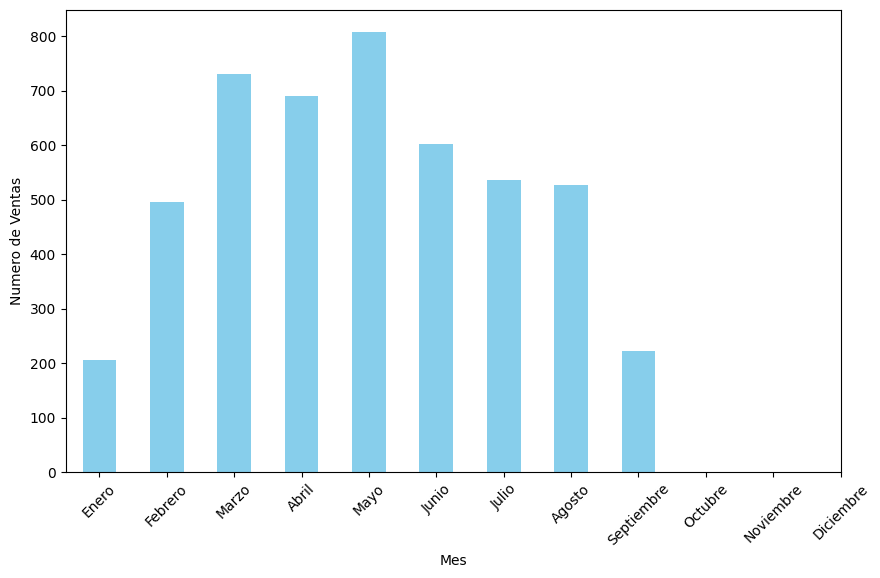

In [97]:
# Grafico de barras para ver como se distribuyen las ventas por mes

ventas_por_mes.plot(kind='bar', color ='skyblue', figsize= (10, 6))
plt.title = ("Ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Numero de Ventas")
plt.xticks(range(12), ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
              'Agosto', 'Septiembre', 'Octubre','Noviembre','Diciembre'], rotation = 45)
plt.show()

Conclusiones claras:
Pico de ventas en primavera (marzo a mayo):

Esto sugiere una posible estacionalidad en las ventas de coches.
Este patrón podría estar influido por promociones, clima favorable, o ciclos típicos del mercado.

Meses bajos en invierno y otoño:

Enero, septiembre y finales de año presentan menos ventas. Esto podría estar relacionado con factores económicos, como el presupuesto de inicio/fin de año o menores incentivos para comprar.

### Correlaciones

Calcular la matriz de correlacion, IMPORTANTE NO SE PUEDE HACER CORRELACION CON UN DATAFRAME QUE CONTIENE COLUMNAS EN FORMATO STRING, POR ESO SELECCIONAR SOLO NUMERICAS


In [98]:
# Seleccionar solo columnas numericas 
bmw2_numericas = bmw2.select_dtypes(include=["float","int64"])


correlaciones = bmw2_numericas.corr()

# Filtro correlaciones con precio y las ordeno:

correlaciones_precio = correlaciones["precio"].sort_values(ascending=False)
correlaciones_precio

precio        1.000000
potencia      0.638967
Antiguedad   -0.289732
km           -0.409784
Name: precio, dtype: float64

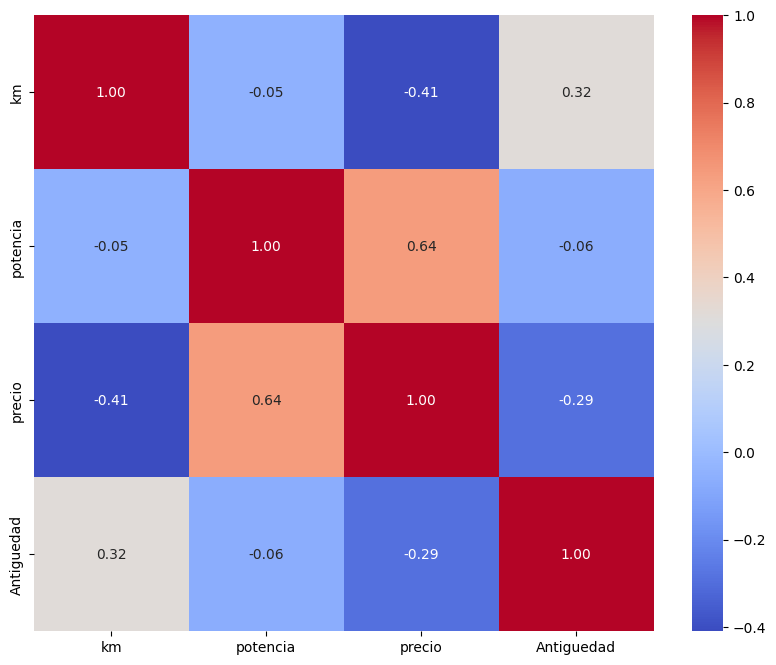

In [99]:
# Visualizar todas las correlaciones

# Tamaño de la figura
plt.figure(figsize=(10, 8))

# Mapa de calor
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt = ".2f")

# Asignamos el titulo
plt.title=("Matriz de Correlación")

# Muestra el grafico
plt.show()

#### Interpretación del gráfico:

Diagonal principal (de arriba a la izquierda a abajo a la derecha):

Siempre será 1.00, ya que cada variable está perfectamente correlacionada consigo misma.

#### Relaciones con precio:

POTENCIA (0.64): Tiene una correlación positiva moderada a fuerte con el precio. Esto significa que los autos con mayor potencia suelen tener precios más altos.

KM (-0.41): Tiene una correlación negativa moderada con el precio. Esto indica que los autos con mayor kilometraje tienden a tener precios más bajos.

ANTIGUEDAD (-0.29): Tiene una correlación negativa leve, lo que sugiere que los autos más antiguos tienden a tener precios más bajos, pero no es tan significativo como el kilometraje.


#### Relaciones entre otras variables:

km y antiguedad (0.32): Tienen una correlación positiva leve. Esto tiene sentido, ya que los autos más antiguos tienden a tener más kilometraje.
potencia no tiene correlación significativa con km o antiguedad: Esto muestra que la potencia de un auto no depende directamente de su antigüedad o kilometraje.



#### Conclusiones:

Variables importantes para el modelo:

potencia (positiva) y km (negativa) son las variables numéricas más relevantes para predecir el precio.
Antigüedad:

Aunque tiene una correlación negativa con el precio, es menos relevante comparada con km o potencia.
Colinealidad:

No parece haber colinealidad alta entre las variables (todas tienen correlaciones relativamente bajas entre sí), lo cual es ideal para un modelo.


### Limpieza Variables Categoricas

In [100]:
# Aqui mostramos las variables categoricas
for i in bmw2:
 if bmw2[i].dtype.kind == 'O':    
  print(bmw2[i].value_counts(),'\n')

modelo
320                  747
520                  630
318                  562
X3                   437
116                  358
                    ... 
216                    1
220 Active Tourer      1
 Active Tourer         1
225 Active Tourer      1
214 Gran Tourer        1
Name: count, Length: 76, dtype: int64 

tipo_gasolina
diesel           4610
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

tipo_coche
estate         1917
sedan          1159
suv             754
hatchback       488
SUV             291
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64 

Color_simplificado
black    1931
Otros    1819
grey     1067
Name: count, dtype: int64 



In [101]:
# Desplegamos la variable modelo

pd.set_option('display.max_rows', None)
bmw2["modelo"].value_counts()

modelo
320                  747
520                  630
318                  562
X3                   437
116                  358
X1                   274
316                  233
X5                   231
525                  182
530                  157
118                  143
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   45
X6                    44
420                   42
120                   36
330                   33
420 Gran Coupé        33
730                   33
520 Gran Turismo      23
640 Gran Coupé        19
325                   19
530 Gran Turismo      18
740                   18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
418 Gran Coupé         8
X6 M                   8
335                    7
M3                     7
640                    7
528                    6
435 Gran Coupé    

In [102]:
# Creamos funcion para agrupar los modelos

def Agrupar_modelos(modelo):
   if modelo.startswith("1"):
       return "Serie 1"
   elif modelo.startswith("2"):
      return "Serie 2"
   elif modelo.startswith("3"):
      return "Serie 3"
   elif modelo.startswith("4"):
      return "Serie 4"
   elif modelo.startswith("5"):
      return "Serie 5"
   elif modelo.startswith("6"):
      return "Serie 6"
   elif modelo.startswith("7"):
      return "Serie 7"
   elif "X" in modelo:
      return "SUV"
   elif modelo.startswith("M"):
      return "M-series"
   else:
      return "Otros"

In [103]:
bmw2["modelo_grupo"]= bmw2["modelo"].apply(Agrupar_modelos)

In [104]:
bmw2["modelo_grupo"].value_counts()

modelo_grupo
Serie 3     1786
Serie 5     1133
SUV         1060
Serie 1      563
Serie 4      101
Serie 7       54
Serie 2       49
Serie 6       30
M-series      26
Otros         15
Name: count, dtype: int64

In [105]:
bmw2.groupby('modelo_grupo')['precio'].mean().round(2)

modelo_grupo
M-series    36626.92
Otros       21266.67
SUV         21467.64
Serie 1      9983.30
Serie 2     16726.53
Serie 3     12164.22
Serie 4     25185.15
Serie 5     16773.26
Serie 6     34223.33
Serie 7     28575.93
Name: precio, dtype: float64

In [106]:
bmw2['modelo_grupo'] = bmw2['modelo_grupo'].apply(
    lambda x: x if bmw2['modelo_grupo'].value_counts()[x] > 120 else 'Otros'
)

In [107]:
bmw2["modelo_grupo"].value_counts()

modelo_grupo
Serie 3    1786
Serie 5    1133
SUV        1060
Serie 1     563
Otros       275
Name: count, dtype: int64

In [108]:
bmw3 = bmw2.copy()

In [109]:
bmw3.drop(columns=["modelo"], inplace= True)

In [110]:
for i in bmw3:
 if bmw3[i].dtype.kind == 'O':    
  print(bmw3[i].value_counts(),'\n')

tipo_gasolina
diesel           4610
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

tipo_coche
estate         1917
sedan          1159
suv             754
hatchback       488
SUV             291
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64 

Color_simplificado
black    1931
Otros    1819
grey     1067
Name: count, dtype: int64 

modelo_grupo
Serie 3    1786
Serie 5    1133
SUV        1060
Serie 1     563
Otros       275
Name: count, dtype: int64 



In [111]:
def agrupar_tipo_gasolina(tipo):
    if tipo == "Diesel":
        return "diesel" 
    elif tipo == "petrol" or tipo == "hybrid_petrol":
        return "petrol"  
    elif tipo == "electro":
        return None  
    else:
        return tipo 

In [112]:
bmw3["tipo_gasolina"] = bmw3["tipo_gasolina"].apply(agrupar_tipo_gasolina)

In [113]:
bmw3["tipo_gasolina"].value_counts()

tipo_gasolina
diesel    4615
petrol     199
Name: count, dtype: int64

In [114]:
bmw3.drop(columns=["gasolina"], inplace=True)

KeyError: "['gasolina'] not found in axis"

In [ ]:
for i in bmw3:
 if bmw3[i].dtype.kind == 'O':    
  print(bmw3[i].value_counts(),'\n')

tipo_gasolina
diesel    4615
petrol     199
Name: count, dtype: int64 

tipo_coche
estate         1917
sedan          1159
suv             754
hatchback       486
SUV             290
subcompact       77
coupe            73
convertible      30
van              28
Name: count, dtype: int64 

Color_simplificado
black    1931
Otros    1818
grey     1065
Name: count, dtype: int64 

modelo_grupo
Serie 3    1786
Serie 5    1133
SUV        1060
Serie 1     563
Otros       272
Name: count, dtype: int64 



In [ ]:
def agrupar_Suv(tipo):
    if tipo == "SUV":
        return "suv" 
    elif tipo == "subcompact":
        return "Otros"  
    elif tipo == "coupe":
        return "Otros"
    elif tipo == "convertible":
        return "Otros"
    elif tipo == "van":
        return "Otros"
    else:
        return tipo 

In [ ]:
bmw3["tipo_coche"] = bmw3["tipo_coche"].apply(agrupar_Suv)

In [ ]:
bmw3["tipo_coche"].value_counts()

tipo_coche
estate       1917
sedan        1159
suv          1044
hatchback     486
Otros         208
Name: count, dtype: int64

In [ ]:
for i in bmw3:
 if bmw3[i].dtype.kind == 'O':    
  print(bmw3[i].value_counts(),'\n')

tipo_gasolina
diesel    4615
petrol     199
Name: count, dtype: int64 

tipo_coche
estate       1917
sedan        1159
suv          1044
hatchback     486
Otros         208
Name: count, dtype: int64 

Color_simplificado
black    1931
Otros    1818
grey     1065
Name: count, dtype: int64 

modelo_grupo
Serie 3    1786
Serie 5    1133
SUV        1060
Serie 1     563
Otros       272
Name: count, dtype: int64 



### One Hot Encoding (Convertir variables categoricas a numericas, para que el modelo pueda interpretarlas)

In [115]:
bmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   km                    4817 non-null   float64       
 1   potencia              4817 non-null   float64       
 2   fecha_registro        4817 non-null   datetime64[ns]
 3   tipo_gasolina         4814 non-null   object        
 4   tipo_coche            4817 non-null   object        
 5   volante_regulable     4817 non-null   bool          
 6   aire_acondicionado    4817 non-null   bool          
 7   camara_trasera        4817 non-null   bool          
 8   elevalunas_electrico  4817 non-null   bool          
 9   bluetooth             4817 non-null   bool          
 10  gps                   4817 non-null   bool          
 11  alerta_lim_velocidad  4817 non-null   bool          
 12  precio                4817 non-null   float64       
 13  fecha_venta       

In [116]:
def obtener_lista_variables(dataset: pd.DataFrame, target: list[str]) -> tuple[list, list, list]:
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []
    
    for col in dataset:
        if col in target:  # Excluir la columna objetivo
            continue
        
        unique_values = len(set(dataset[col]))
        if dataset[col].dtype.kind in ('f', 'i'):  # Numérica (float o int)
            if unique_values == 2:  # Numérica booleana
                lista_boolean.append(col)
            else:  # Numérica continua
                lista_numericas.append(col)
        elif dataset[col].dtype.kind == 'O':  # Categórica (object/string)
            lista_categoricas.append(col)
    
    return lista_numericas, lista_boolean, lista_categoricas

In [117]:
# Aplicar la función
target = ["precio"]
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(bmw3, target)

print("Numéricas:", lista_numericas)
print("Booleanas:", lista_boolean)
print("Categóricas:", lista_categoricas)

Numéricas: ['km', 'potencia', 'Antiguedad', 'mes_venta']
Booleanas: []
Categóricas: ['tipo_gasolina', 'tipo_coche', 'Color_simplificado', 'modelo_grupo']


In [118]:
# Aplicar One Hot Encoding solo a las columnas categóricas
bmw3_encoded = pd.get_dummies(bmw3, columns=lista_categoricas, drop_first=True)

# Verificar el resultado
bmw3_encoded.head()

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,Color_simplificado_black,Color_simplificado_grey,modelo_grupo_SUV,modelo_grupo_Serie 1,modelo_grupo_Serie 3,modelo_grupo_Serie 5
0,140411.0,100.0,2012-02-01,True,True,False,True,False,True,True,...,False,False,False,False,True,False,False,True,False,False
1,13929.0,317.0,2013-07-01,True,True,False,False,True,True,True,...,False,False,False,False,False,True,False,False,False,False
2,183297.0,120.0,2012-04-01,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,128035.0,135.0,2013-07-01,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,97097.0,160.0,2013-07-01,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False


#### Variables numericas (Escalado)

In [119]:
# Escalado de variables numericas:

scaler = MinMaxScaler()
bmw3_encoded[lista_numericas] = scaler.fit_transform(bmw3_encoded[lista_numericas])

In [120]:
# Cada valor ahora representa su posición relativa en el rango de datos de esa variable.
# Por ejemplo, para km:
# 0.14 (primer registro) significa que ese valor de kilómetros está cerca del 14% del rango total 
# de los kilómetros en el dataset.

bmw3_encoded[lista_numericas].head()

,km,potencia,Antiguedad,mes_venta
0,0.140413,0.236407,0.323529,0.000
1,0.013987,0.749409,0.294118,0.125
2,0.183280,0.283688,0.323529,0.125
3,0.128043,0.319149,0.294118,0.125
4,0.097118,0.378251,0.294118,0.375


In [121]:
# Matriz de correlación para las variables numéricas escaladas

correlacion = bmw3_encoded[lista_numericas].corr()

# Visualizacion con un gradiente

correlacion.style.background_gradient(cmap='coolwarm')

,km,potencia,Antiguedad,mes_venta
km,1.000000,-0.049786,0.317013,0.000508
potencia,-0.049786,1.000000,-0.063509,-0.027786
Antiguedad,0.317013,-0.063509,1.000000,0.182292
mes_venta,0.000508,-0.027786,0.182292,1.000000


¿Eliminar variables?

Como no hay correlaciones muy altas (por encima de 0.9) entre estas variables, no es necesario eliminar ninguna en esta etapa.

Conclusión:

Todas las variables parecen aportar información única al dataset y podrían ser útiles para modelar.

#### Variables booleanas

In [122]:
lista_boolean = bmw3_encoded.select_dtypes(include=['bool']).columns.tolist()

for col in lista_boolean:
    print(f"{col}:\n{bmw3_encoded[col].value_counts(normalize=True)}\n")

volante_regulable:
volante_regulable
True     0.550343
False    0.449657
Name: proportion, dtype: float64

aire_acondicionado:
aire_acondicionado
True     0.816068
False    0.183932
Name: proportion, dtype: float64

camara_trasera:
camara_trasera
False    0.79863
True     0.20137
Name: proportion, dtype: float64

elevalunas_electrico:
elevalunas_electrico
False    0.53934
True     0.46066
Name: proportion, dtype: float64

bluetooth:
bluetooth
False    0.79427
True     0.20573
Name: proportion, dtype: float64

gps:
gps
True     0.932531
False    0.067469
Name: proportion, dtype: float64

alerta_lim_velocidad:
alerta_lim_velocidad
True     0.612622
False    0.387378
Name: proportion, dtype: float64

tipo_gasolina_petrol:
tipo_gasolina_petrol
False    0.958688
True     0.041312
Name: proportion, dtype: float64

tipo_coche_convertible:
tipo_coche_convertible
False    0.993772
True     0.006228
Name: proportion, dtype: float64

tipo_coche_coupe:
tipo_coche_coupe
False    0.984845
True     0

Eliminar Variables irrelevantes

In [123]:
for col in lista_boolean:
    if bmw3_encoded[col].value_counts(normalize=True).max() >= 0.95:
        bmw3_encoded.drop(columns=[col], inplace=True)
        print(f"Eliminada: {col}")

Eliminada: tipo_gasolina_petrol
Eliminada: tipo_coche_convertible
Eliminada: tipo_coche_coupe
Eliminada: tipo_coche_subcompact
Eliminada: tipo_coche_van


#### Variables Temporales

In [124]:
bmw3_encoded["registro_year"] = bmw3_encoded["fecha_registro"].dt.year
bmw3_encoded["registro_month"] = bmw3_encoded["fecha_registro"].dt.month
bmw3_encoded["venta_year"] = bmw3_encoded["fecha_venta"].dt.year
bmw3_encoded["venta_month"] = bmw3_encoded["fecha_venta"].dt.month

# Eliminar columnas originales si no son necesarias
bmw3_encoded.drop(columns=["fecha_registro", "fecha_venta"], inplace=True)

In [125]:
bmw3_encoded.drop(columns=["mes_venta"], inplace=True)

In [126]:
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame completo
bmw3_encoded.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,Antiguedad,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,Color_simplificado_black,Color_simplificado_grey,modelo_grupo_SUV,modelo_grupo_Serie 1,modelo_grupo_Serie 3,modelo_grupo_Serie 5,registro_year,registro_month,venta_year,venta_month
0,0.140413,0.236407,True,True,False,True,False,True,True,11300.0,0.323529,True,False,False,False,True,False,False,True,False,False,2012,2,2018,1
1,0.013987,0.749409,True,True,False,False,True,True,True,69700.0,0.294118,False,False,False,False,False,True,False,False,False,False,2013,7,2018,2
2,0.183280,0.283688,False,False,False,True,False,True,False,10200.0,0.323529,True,False,False,False,False,False,False,False,True,False,2012,4,2018,2
3,0.128043,0.319149,True,True,False,True,True,True,True,25100.0,0.294118,False,False,False,False,False,False,False,False,False,False,2013,7,2018,2
4,0.097118,0.378251,True,True,False,False,True,True,True,33400.0,0.294118,False,False,False,False,False,False,False,False,False,False,2013,7,2018,4


In [128]:
## Data Set Limpio

bmw3_encoded.to_pickle("bmw3_preprocesado.pkl")

### Definición de un Problema y Modelo Random Forest Regressor

In [ ]:
pd.read_pickle("bmw3_preprocesado.pkl")

Variable objetivo (target): precio

Pregunta: ¿Podemos predecir el precio de un vehículo en función de sus características?

In [130]:
from sklearn.model_selection import train_test_split

# Definir variables independientes (X) y dependiente (y)
X = bmw3_encoded.drop(columns=["precio"]) # Eliminamos la columna bjetivo
Y = bmw3_encoded["precio"]

# Dividir en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo
model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 17684408.806016598
R2 Score: 0.7779191886858828


#### Evaluar el Modelo: (Apuntes)


Evalúe el rendimiento del modelo utilizando métricas clave:

MSE (Mean Squared Error): Cuanto más bajo, mejor.

R² Score: Indica qué tan bien el modelo explica la variabilidad de los datos (1.0 es perfecto).

Si el modelo tiene un rendimiento pobre:

Ajustar los hiperparámetros del modelo.

Probar otro modelo (por ejemplo, XGBoost o LightGBM).

Agregar o transformar características.

Visualizamos Resultados

TypeError: 'str' object is not callable

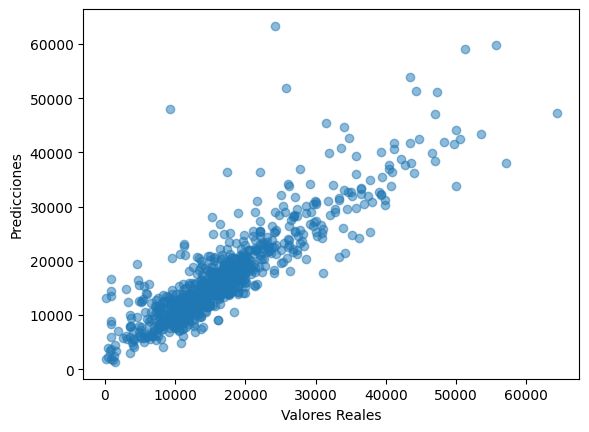

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")

# Guardar el gráfico como imagen
plt.savefig("images/real_vs_pred.png")  
plt.show()

In [ ]:
import joblib
# Guardar el modelo
joblib.dump(model, "random_forest_model.pkl")
print("Modelo guardado como random_forest_model.pkl")

Modelo guardado como random_forest_model.pkl
